# Visualization

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Top 15 restaurants having maximum number of outlets :

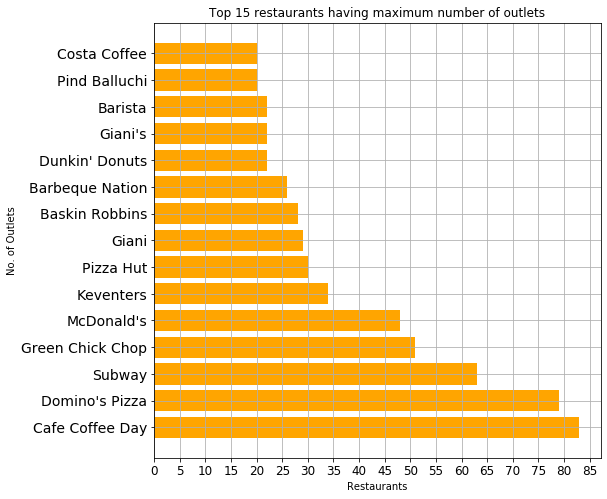

In [9]:
#reading data
data=pd.read_csv('datasets/zomato.csv', encoding='ISO-8859-1')
df=data.copy()
dic=dict()
#created a dictionary which will contain the frequencies of all the restaurants
for i in df['Restaurant Name']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
#instead of working with the dictionary, append all the dictionary values and keys to numpy arrays
np_names=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_names=np_names[np.argsort(np_freq)][::-1]#sorted in descending order
np_freq=np_freq[np.argsort(np_freq)][::-1]#sorted in descending order
#plotted
plt.figure(figsize=(8, 8))
plt.barh(np_names[0:15], np_freq[0:15], color='orange')
plt.grid()
plt.ylabel('No. of Outlets')
plt.xlabel('Restaurants')
plt.title('Top 15 restaurants having maximum number of outlets')
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

## The histogram of aggregate rating of restaurant

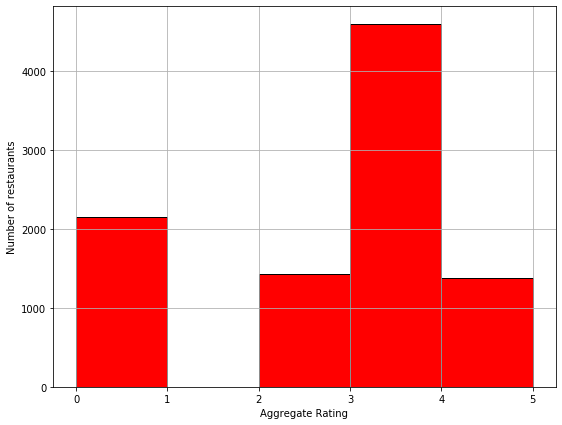

In [10]:
x=df['Aggregate rating'].dropna()
plt.figure(figsize=(9, 7))
plt.xticks(range(6))
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of restaurants')
plt.hist(x, color='red', edgecolor='black', bins=range(6))
#fixed the bins exactly to align with the xticks.
plt.grid()
plt.show()

## Bar graph of top 10 restaurants in the data with the highest number of votes

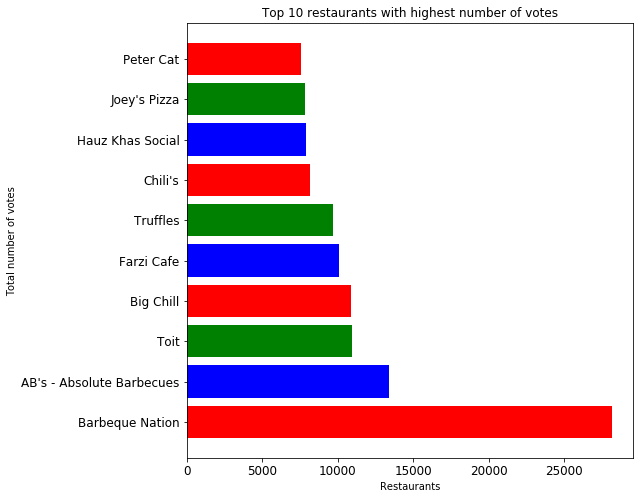

In [11]:
np_restaurants=np.array([i for i in df['Restaurant Name']])
np_votes=np.array([i for i in df['Votes']])
#created two numpy arrays of votes and restaurants from the dataframe
dic=dict()
#summed up the number of votes of different restaurants in the dctionary
for i in range(len(np_restaurants)):
    if np_restaurants[i] in dic.keys():
        dic[np_restaurants[i]]+=np_votes[i]
    else:
        dic[np_restaurants[i]]=np_votes[i]
#when the dictionary is created, append all the values and the keys of the dictionary in the numpy arrays.
np_r=np.array([i for i in dic.keys()])
np_v=np.array([i for i in dic.values()])
np_r=np_r[np.argsort(np_v)][::-1]#sorted
np_v=np_v[np.argsort(np_v)][::-1]#sorted

#plotted finally
plt.figure(figsize=(8, 8))
plt.barh(np_r[0:10], np_v[0:10], color='rbg')
plt.xlabel('Restaurants')
plt.ylabel('Total number of votes')
plt.title('Top 10 restaurants with highest number of votes')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## The pie graph of top 10 cuisines present in restaurants in the USA

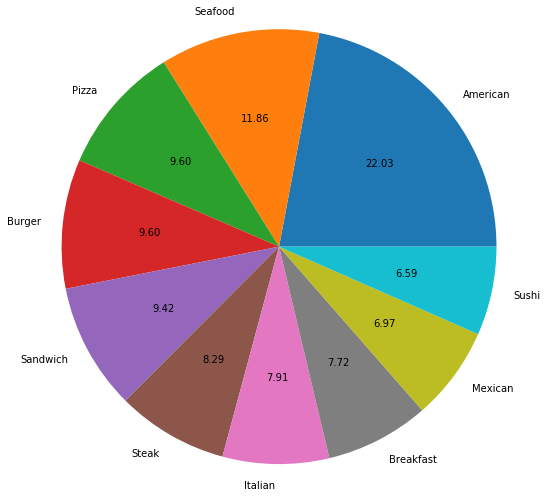

In [12]:
#top cuisinies will be those which are served by maximum number of restaurants.
df=data.copy()
#copied and filtered the data according to the question
df=df.loc[df['Cuisines'].notnull()]#filtering and keeping all the non null values.
df=df.loc[df['Currency']=='Dollar($)']# to filter the country, we can use their currency, that is US dollar
cus=[]#append all the cuisinies available in this list and their frequency is stored as dictionary values.
for i in df.Cuisines:
    for j in i.split(','):
        cus.append(j.strip())
dic=dict()
for i in cus:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
        
#append the values and keys of the dictionary in the numpy arrays for the easiness of sorting and plotting later.
np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]#sorted
np_freq=np.sort(np_freq)[::-1]#sorted
#plotted
plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2.5, autopct='%.2f')
plt.show()

## Bubble graph of a number of Restaurants present in the city of India

<Figure size 432x288 with 0 Axes>

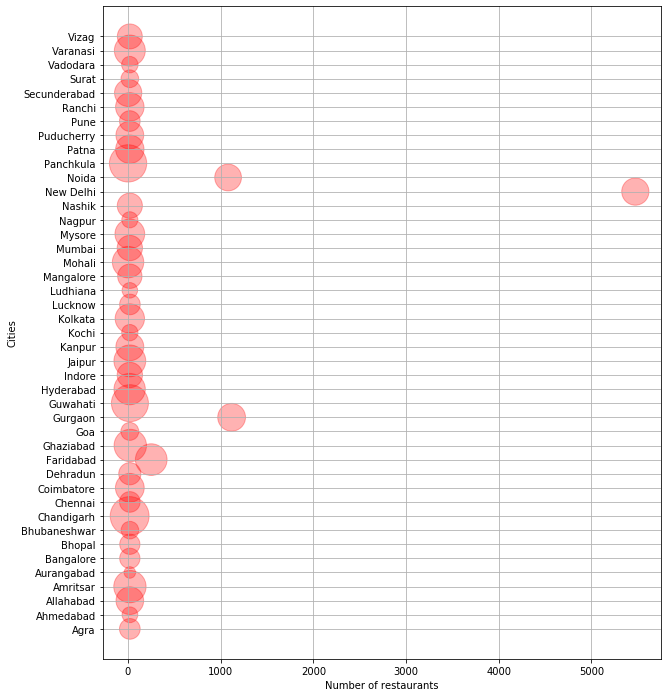

<Figure size 432x288 with 0 Axes>

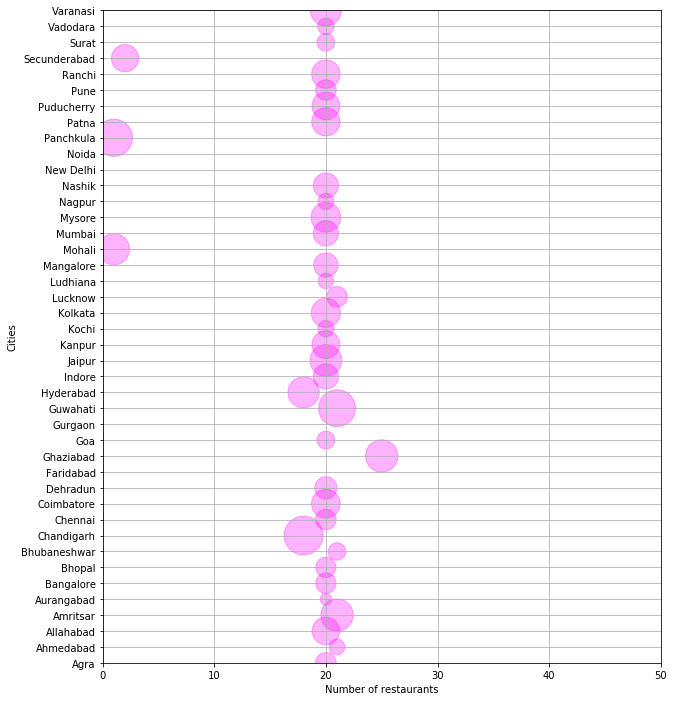

In [14]:
# Make 2 graphs the first one is between cities and number of restaurants and the second graph is
#the same except its x coordinates are in the range 0 to 50 for a clear visualisation of the first graph.
#i.e. the second graph is the enlarged version of the first graph.
#both the graphs are same except the variation in the range of x axis.
df=data.copy()
df=df.loc[df.Currency=='Indian Rupees(Rs.)']# For indian restaurants only
np_rating=np.array([i for i in df['Aggregate rating']])#create a numpy array with aggregate rating of each restaurant
np_votes=np.array([i for i in df['Votes']])#numpy array of votes of each restaurant
np_city=np.array([i for i in df['City']])#numpy array of cities column from the data frame
dic=dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]
dic1=dict()#this dictionary contains the number of restaurants present in each city. i.e. how many times the cities have occured in the dataframe.

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1
#dictionary created!

size=[]
for i in dic:
    size.append(dic[i])
        
#plotted first graph
plt.subplots(0, 2)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='red')
plt.xlabel('Number of restaurants')
plt.ylabel('Cities')
plt.grid()
plt.show()


#plotted the same graph with zoomed x axis. to analyse it properly
plt.subplots(0, 1)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='magenta')
plt.xlabel('Number of restaurants')
plt.ylabel('Cities')
plt.axis([0, 50, 'Agra', 'Varanasi'])
plt.grid()
plt.show()
#these bubbles in the graph are overlapping but it is still recognizabe.